In [1]:
# Install required packages if missing
# This cell will attempt to install packages used by the notebook:
#   numpy, matplotlib, tensorflow, certifi
# stdlib modules used by the notebook (os, math, mpl_toolkits) do not need installation.
import sys
import subprocess
def install_if_missing(module_name, pypi_name=None):
    try:
        __import__(module_name)
        print(f"{module_name} already installed")
    except Exception:
        pkg = pypi_name or module_name
        print(f"Installing {pkg}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
# Install the modules used by the imports cell
install_if_missing('numpy')
install_if_missing('matplotlib')
install_if_missing('tensorflow')
# certifi provides a trusted CA bundle for SSL
install_if_missing('certifi')
print('\nAll required packages are present (or have been installed).')

numpy already installed
matplotlib already installed
tensorflow already installed
certifi already installed

All required packages are present (or have been installed).


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# Load dataset
# Workaround for macOS / environment SSL issues: use certifi's CA bundle for HTTPS requests
import ssl
try:
    import certifi
    ssl_ctx = ssl.create_default_context(cafile=certifi.where())
    ssl._create_default_https_context = lambda: ssl_ctx
    print('Configured SSL context to use certifi CA bundle')
except Exception as e:
    print('Could not configure certifi-based SSL context, continuing and letting urllib/tf handle SSL (error):', e)

try:
    (x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
    print('Loaded MNIST dataset successfully')
    print('x_train_full shape:', x_train_full.shape)
    print('y_train_full shape:', y_train_full.shape)
    print('x_test shape:', x_test.shape)
    print('y_test shape:', y_test.shape)
except Exception as e:
    print('Failed to load MNIST dataset:', e)
    raise

Configured SSL context to use certifi CA bundle
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded MNIST dataset successfully
x_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
# --- Data Exploration ---

# Print shapes
print(x_train_full.shape)
print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [5]:
# Inspect an element
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

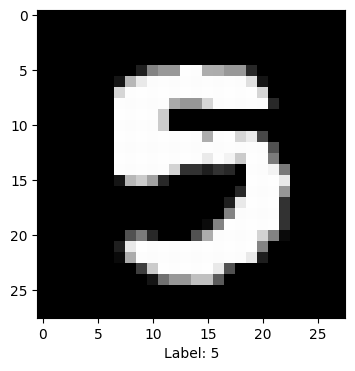

In [6]:
# Create a function that visualizes a digit and its corresponding label
def visualize_pixel(index):
    plt.figure(figsize=(4, 4))
    plt.imshow(x_train_full[index], cmap='gray')
    plt.xlabel(f"Label: {y_train_full[index]}")
    plt.show()

visualize_pixel(620)

In [7]:
# --- Data Preprocessing ---

# Normalize input features
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

In [8]:
# Splitting training data into training and validation sets
validation_split = 0.1
split_index = int(x_train_full.shape[0] * (1 - validation_split))

x_val = x_train_full[split_index:]
y_val = y_train_full[split_index:]
x_train = x_train_full[:split_index]
y_train = y_train_full[:split_index]

In [9]:
# Reshape data for the model
x_train = x_train.reshape((-1, 28, 28, 1))
x_val = x_val.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [10]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
# --- Model Building ---

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Input layer
    Dense(128, activation='relu'),     # First hidden layer
    Dense(64, activation='relu'),      # Second hidden layer
    Dense(10, activation='softmax')    # Output layer
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8645 - loss: 0.4539 - val_accuracy: 0.9690 - val_loss: 0.1096
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9665 - loss: 0.1087 - val_accuracy: 0.9760 - val_loss: 0.0828
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9770 - loss: 0.0724 - val_accuracy: 0.9770 - val_loss: 0.0791
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9817 - loss: 0.0539 - val_accuracy: 0.9787 - val_loss: 0.0761
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9768 - val_loss: 0.0816
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9763 - val_loss: 0.0876
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9782 - val_loss: 0.0812
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9927 - loss: 0.0230 -

In [14]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.1028
Test Loss: 0.0916525274515152
Test Accuracy: 0.9771999716758728
